# Unsupervised Sentiment Analysis
- When you have unlabled texts (e.g., customer product reviews, movie reviews, political tweets)
- Unsupervised = Lexicon-based
- If positive (negative) words dominate, the sentence is classified as positive (negative)
- Corpus : Your dataset
- Lexicon : a collection of positive and negative words
- Some lexicons are simple: Lists of positive and negative words
- Some advanced lexicons : Offer scores for each word (strength of polarity)
    - Awesome (+4), Terrible (-4)

In [2]:
import csv
import re
import pandas as pd

import nltk
from nltk.corpus import stopwords

How many positive and negative reviews are in the dataset below?

In [18]:
# dataset

reviews = [
    "The server was rude, bad location, poor service overall, call 911!",
    "This bike is amazing, but the brake is very poor",
    "This ice maker works great, the price is very reasonable, some bad smell from the ice maker",
    "The food was awesome, but the water was very rude"
    ]

In [19]:
# negative and positive word lists ... this is called "lexicon"

positive_words = ['amazing', 'great', 'awesome', 'reasonable']
negative_words = ['poor', 'bad', 'rude']

In [20]:
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in reviews]
# tokenize
texts = [[word for word in document.lower().split() ] for document in documents]
texts

[['the',
  'server',
  'was',
  'rude',
  'bad',
  'location',
  'poor',
  'service',
  'overall',
  'call'],
 ['this',
  'bike',
  'is',
  'amazing',
  'but',
  'the',
  'brake',
  'is',
  'very',
  'poor'],
 ['this',
  'ice',
  'maker',
  'works',
  'great',
  'the',
  'price',
  'is',
  'very',
  'reasonable',
  'some',
  'bad',
  'smell',
  'from',
  'the',
  'ice',
  'maker'],
 ['the',
  'food',
  'was',
  'awesome',
  'but',
  'the',
  'water',
  'was',
  'very',
  'rude']]

In [21]:
for sentence in texts:
    print sentence    

['the', 'server', 'was', 'rude', 'bad', 'location', 'poor', 'service', 'overall', 'call']
['this', 'bike', 'is', 'amazing', 'but', 'the', 'brake', 'is', 'very', 'poor']
['this', 'ice', 'maker', 'works', 'great', 'the', 'price', 'is', 'very', 'reasonable', 'some', 'bad', 'smell', 'from', 'the', 'ice', 'maker']
['the', 'food', 'was', 'awesome', 'but', 'the', 'water', 'was', 'very', 'rude']


In [22]:
#loop inside loop (nested loop)
for sentence in texts:  
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    print positive, negative

0 3
1 1
2 1
1 1


In [23]:
for sentence in texts: 
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    print positive, negative, positive-negative, "Positive" if positive-negative > 0 else "Neutral" if positive-negative == 0 else "Negative"

0 3 -3 Negative
1 1 0 Neutral
2 1 1 Positive
1 1 0 Neutral


# Bing Liu lexicon

<img src = "images\bingliu_pos.gif">
<img src = "images\bingliu_neg.gif">

The server was rude, bad location, poor service overall
This bike is amazing, but the brake is very poor
This ice maker works great, the price is very reasonable, some bad smell from the ice maker
The food was awesome, but the water was very rude


In [45]:
openfile = open("data/4rows_sentimentdata.csv", "rb")
r = csv.reader(openfile)
reviews = []
for i in r:
    reviews.append(i)
openfile.close()
for i in reviews:
    print i
reviews = [x for y in reviews for x in y]
reviews


['The server was rude, bad location, poor service overall']
['This bike is amazing, but the brake is very poor']
['This ice maker works great, the price is very reasonable, some bad smell from the ice maker']
['The food was awesome, but the water was very rude']


['The server was rude, bad location, poor service overall',
 'This bike is amazing, but the brake is very poor',
 'This ice maker works great, the price is very reasonable, some bad smell from the ice maker',
 'The food was awesome, but the water was very rude']

In [24]:
reviews = [
    "The server was rude, bad location, poor service overall, call 911!",
    "This bike is amazing, but the brake is very poor",
    "This ice maker works great, the price is very reasonable, some bad smell from the ice maker",
    "The food was awesome, but the water was very rude"
    ]

# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in reviews]
# tokenize
texts = [[word for word in document.lower().split() ] for document in documents]

#Bing-Liu lexicon (positive word list & negative word list)
positive_words = open("data/positive-words.txt", "rb").read().splitlines()
negative_words = open("data/negative-words.txt", "rb").read().splitlines()

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    print positive, negative, positive-negative, "Positive" if positive-negative > 0 else "Neutral" if positive-negative == 0 else "Negative"

0 3 -3 Negative
1 1 0 Neutral
3 2 1 Positive
1 1 0 Neutral


### if customer or moview reviews are in a single CSV file

In [3]:
openfile = open("data/4rows_sentimentdata.csv", "rb")
r = csv.reader(openfile)
reviews = []
for i in r:
    reviews.append(i)
openfile.close()

#remove the extra bracket
reviews = [x for y in reviews for x in y]
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in reviews]
# tokenize
texts = [[word for word in document.lower().split() ] for document in documents]

#Bing-Liu lexicon (positive word list & negative word list)
positive_words = open("data/positive-words.txt", "rb").read().splitlines()
negative_words = open("data/negative-words.txt", "rb").read().splitlines()

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    print positive, negative, positive-negative, "Positive" if positive-negative > 0 else "Neutral" if positive-negative == 0 else "Negative"

0 3 -3 Negative
1 1 0 Neutral
3 2 1 Positive
1 1 0 Neutral


In [4]:
reviews

['The server was rude, bad location, poor service overall',
 'This bike is amazing, but the brake is very poor',
 'This ice maker works great, the price is very reasonable, some bad smell from the ice maker',
 'The food was awesome, but the water was very rude']

# Appendix

## Step by step

In [49]:
openfile = open("data/4rows_sentimentdata.csv", "rb")
r = csv.reader(openfile)
reviews = []
for i in r:
    reviews.append(i)
openfile.close()

In [50]:
reviews

[['The server was rude, bad location, poor service overall'],
 ['This bike is amazing, but the brake is very poor'],
 ['This ice maker works great, the price is very reasonable, some bad smell from the ice maker'],
 ['The food was awesome, but the water was very rude']]

In [51]:
#remove the extra bracket
reviews = [x for y in reviews for x in y]
reviews

['The server was rude, bad location, poor service overall',
 'This bike is amazing, but the brake is very poor',
 'This ice maker works great, the price is very reasonable, some bad smell from the ice maker',
 'The food was awesome, but the water was very rude']

In [52]:
positive_words = open("data\\positive-words.txt", "rb").read().splitlines()
negative_words = open("data\\negative-words.txt", "rb").read().splitlines()

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    print positive, negative, positive-negative, "Positive" if positive-negative > 0 else "Neutral" if positive-negative == 0 else "Negative"

IOError: [Errno 2] No such file or directory: 'data\\positive-words.txt'

## Further analysis: Separating Positive/Negative Reviews & Word Frequency & Word Cloud

In [30]:
positive_review = []
negative_review = []
neutral_review = []

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    if positive-negative > 0:
        positive_review.append(sentence)
    elif positive-negative == 0:
        neutral_review.append(sentence)
    else:
        negative_review.append(sentence)

In [31]:
print len(positive_review)
print len(negative_review)
print len(neutral_review)

1
1
2


In [32]:
positive_review

[['this',
  'ice',
  'maker',
  'works',
  'great',
  'the',
  'price',
  'is',
  'very',
  'reasonable',
  'some',
  'bad',
  'smell',
  'from',
  'the',
  'ice',
  'maker']]

In [33]:
# remove extra brackets)
positive_review_tokens = [x for y in positive_review for x in y]

# count words in list
from collections import Counter
positive_review_wordcounts= Counter(positive_review_tokens)
positive_review_wordcounts.most_common()

[('ice', 2),
 ('the', 2),
 ('maker', 2),
 ('great', 1),
 ('from', 1),
 ('this', 1),
 ('price', 1),
 ('some', 1),
 ('very', 1),
 ('bad', 1),
 ('reasonable', 1),
 ('works', 1),
 ('smell', 1),
 ('is', 1)]

Good results, but we could do more text preprocessing (e.g., removing stopwords, removing short words)

In [34]:
# remove common words 
stoplist = stopwords.words('english')
# if you want to remove additional words ... here I consider ice and from as unimportant words
more = set(['ice', 'from'])
stoplist = set(stoplist) | more 
texts = [[word for word in text if word not in stoplist] for text in positive_review]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [35]:
texts

[['maker', 'works', 'great', 'price', 'reasonable', 'bad', 'smell', 'maker']]

In [36]:
# remove extra brackets
cleaned_positive_review_tokens = [x for y in texts for x in y]
cleaned_positive_review_tokens

['maker', 'works', 'great', 'price', 'reasonable', 'bad', 'smell', 'maker']

In [37]:
# word frequency on positive reviews
positive_review_wordcounts= Counter(cleaned_positive_review_tokens)
positive_review_wordcounts.most_common(20)

[('maker', 2),
 ('great', 1),
 ('price', 1),
 ('bad', 1),
 ('reasonable', 1),
 ('works', 1),
 ('smell', 1)]

### Word Cloud 

Installation (https://github.com/amueller/word_cloud)

- **pip install wordcloud**

If there is error, follow this:

- Download the .whl file compatible with your Python version and your windows distribution (32bit or 64bit) from http://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud (in my case, I downloaded **wordcloud-1.2.1-cp27-cp27m-win_amd64.whl**)
- cd to the file path (most likely to your **downloads** folder)
- Run this command **python -m pip install <filename>**  (in my case, **python -m pip install wordcloud-1.2.1-cp27-cp27m-win_amd64.whl**)

More information about this package

- http://peekaboo-vision.blogspot.de/2012/11/a-wordcloud-in-python.html

(-0.5, 399.5, 199.5, -0.5)

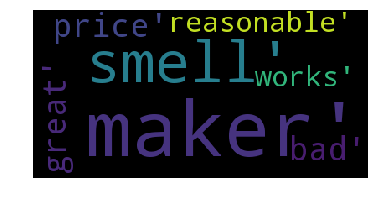

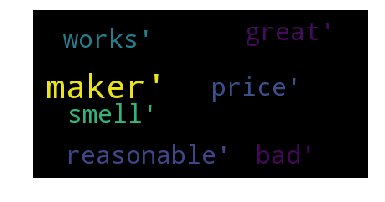

In [38]:
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

text = str(cleaned_positive_review_tokens)

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

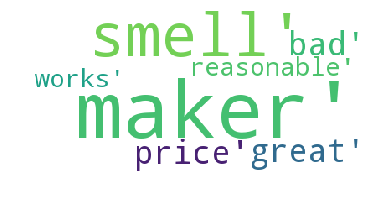

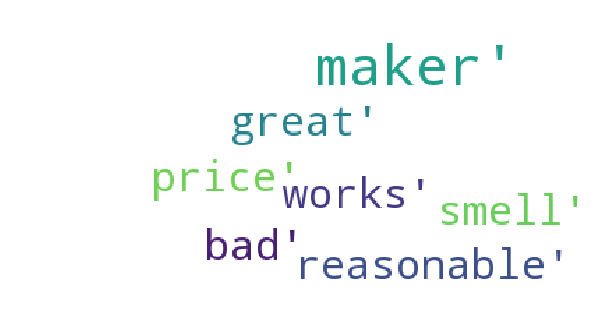

In [39]:
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

text = str(cleaned_positive_review_tokens) 

# Generate a word cloud image
wordcloud = WordCloud(background_color="white", max_words=2000).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("data/pos.png")
plt.savefig("data/pos.pdf")

In [40]:
# save the word frequency in dataframe (Excel like)
positivereview_wordfreq = pd.DataFrame(positive_review_wordcounts.most_common())
positivereview_wordfreq

,0,1
0,maker,2
1,great,1
2,price,1
3,bad,1
4,reasonable,1
5,works,1
6,smell,1


# Now, you can perform the same analysis for negative reviews
- First, perform the word frequency analysis on the negative reviews
- Then, combine the results of positive and negative reviews for comparison
- Also, you can compare the word clouds

In [53]:
negative_review

[['the',
  'server',
  'was',
  'rude',
  'bad',
  'location',
  'poor',
  'service',
  'overall']]

In [54]:
for i in negative_review:
    print i
    

['the', 'server', 'was', 'rude', 'bad', 'location', 'poor', 'service', 'overall']


In [56]:
# remove extra brackets)
negative_review_tokens = [x for y in negative_review for x in y]

# count words in list
from collections import Counter
negative_review_wordcounts= Counter(negative_review_tokens)
negative_review_wordcounts.most_common()

[('poor', 1),
 ('service', 1),
 ('rude', 1),
 ('overall', 1),
 ('server', 1),
 ('bad', 1),
 ('location', 1),
 ('the', 1),
 ('was', 1)]

# Sentiment analysis of the data in sample_restaurant_reviews.csv